In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(0)
N = 1000_000


# 2 確率変数と確率分布

第 3 章の分布に関するベイズの定理を理解できるよう、確率変数と確率分布について学ぶ。


## 2.1 確率変数

事象を離散的に扱う場合、<b>確率変数(random variable)</b>と呼ばれる。例えばコイントスの表裏を表す独立変数の場合、表を 1、裏を 0 とすれば、$X=1, X=0$とそれぞれ表したりする。この時、0 や 1 を<b>実現値(realization)</b>と呼ぶ。離散的であることを強調したい場合には、<b>離散型独立変数(discrete random variable)</b>と呼ぶ。


### 2.1.1 確率分布

確率変数とそれに対応する確率を、<b>確率分布(probability distribution)</b>と呼ぶ。


### 2.1.2 期待値

確率変数 X の<b>期待値(expected value)</b>は以下の式で表される(書籍では"expectation value"と記載しているが、"expected value"の方が一般的なのではないだろうか？)。

$$
E[X] = \sum_{x} x\cdot p(x)
$$


### 2.1.3 　分散

確率変数 X の<b>分散(variance)</b>は以下の式で表される。

\begin{aligned} V[X] &= \sum*{x} (x-E[X])^2 p(x) \\ &= \sum*{x} (x^2 p(x) -2xE[X]p(x) + E[X]^2) \\ &= E[X^2] -2E[X]^2 + E[X]^2 \\ &= E[X^2] - E[X]^2 \end{aligned}

分散の平方根を<b>標準偏差(standard deviation, sd)</b>と呼ぶ。


### 2.1.4 期待値と分散の公式

以下で、書籍に記載の公式をまとめる。少し先取りになるが、連続分布である標準正規分布を用いて、これらを視覚的に理解しよう。


#### 定数 a の期待値

\begin{aligned} E[a] &= \sum*{x} a \cdot p(x) &= a \sum*{x} p(x) &= a \end{aligned}

期待値は、連続分布では平均値とも捉えることができる。


#### 和の期待値

\begin{aligned} E[X+Y] &= \sum*{x} \sum*{y} (x+y) \cdot p(x) p(y) \\ &= \sum*{x} \sum*{y} x \cdot p(x) p(y) + \sum*{x} \sum*{y} y \cdot p(x) p(y) \\ &=E[X] + E[y] \end{aligned}

#### 定数倍の期待値

\begin{aligned} E[aX] &= \sum*{x} ax\cdot p(x) \\ &= a \sum*{x} xp(x) \\ &= aE[X] \\ \end{aligned}

#### X、Y が独立な時の積の期待値

X,Y が独立の時、xy という実現値を取る事象の確率は p(x)p(y)で表せるので、以下のようになる。

\begin{aligned} E[XY] &= \sum*{x} \sum*{y} xy\cdot p(x)p(y) \\ &= E[y]\sum\_{x} xp(x) \\ &= E[x]E[y] \end{aligned}

#### 1 次変換の分散

\begin{aligned} E[aX+b] &= \sum*{x} (ax+b)p(x) \\ &= a\sum*{x} xp(x) + b \sum\_{x} p(x)\\ &= aE[X] + b \\

E[(aX+b)^2] &= \sum\_{x} (a^2x^2 + 2abx + b^2)p(x) \\ &= a^2E[X^2] + 2abE[X] + b^2 \\

V[aX+b] &= E[(aX+b)^2] - E[aX+b]^2 \\ &= a^2E[X^2] + 2abE[X] + b^2 - (aE[X] + b)^2 \\ &= a^2E[X^2] - a^2E[X]^2 \\ &= a^2V[X] \end{aligned}

分散は、分布の平均からの開き具合を示す。まず、平行移動(+b)の部分は、分散すなわち開き具合には全く影響を与えない。一方で、x を a 倍するということは、分布も a 倍広がる。分散は、平均からのズレの二乗で計算されることを踏まえて、$a^2$倍になる。


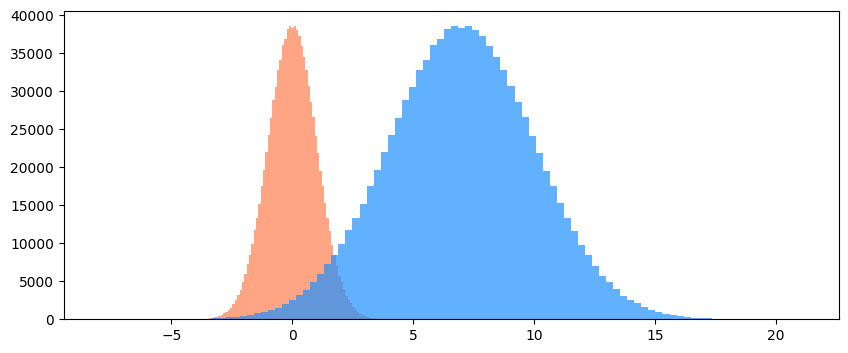

In [3]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()

a = 3
b = 7
x = np.random.randn(N)
ax.hist(x, bins=100, color="coral", alpha=0.7)
ax.hist(a*x+b, bins=100, color="dodgerblue", alpha=0.7)
plt.show()


## 2.2 離散型確率分布関数

数式によって表現される分布を<b>理論分布(theoretical distribution)</b>と呼ぶ。離散型確率変数を与える関数を<b>確率質量関数(probability mass function)</b>と呼ぶ。物理において、重心に全ての質量が存在すると仮定したのと同様のイメージで、「質量(mass)」という用語を「離散型」分布に用いているのだと思われる。


### 2.2.1 ベルヌイ分布

2 値のいずれかを一定確率で取る試行をベルヌイ試行とよび、それに従う確率分布をベルヌイ分布と呼ぶ。

\begin{aligned} f(x|\theta) = \theta^x (1-\theta)^{1-x} \end{aligned}

x=0 の時に確率$\theta$、x=1 の時に確率$1-\theta$を取るようになっている。

分布の性質を決定する$\theta$は<b>母数(parameter)</b>と呼ばれる。


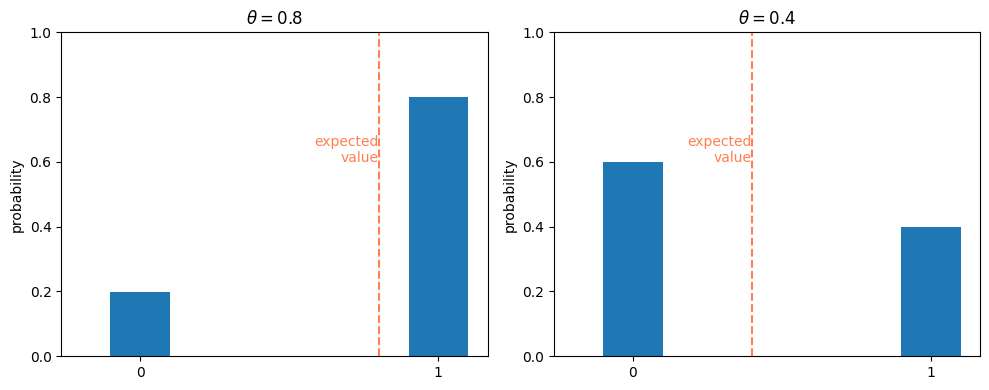

In [4]:
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(121)
theta = 0.8
x = np.random.binomial(1, theta, N)
# グラフ全体を1で正規化
ax.hist(x, weights=np.ones(N)/N, bins=[0, 0.2, 1, 1.2], align='left')
plt.xticks([0, 1])
ax.set_ylabel('probability')
ax.set_title(r'$\theta=$'+str(theta))
ax.axvline(theta, color="coral", linestyle='--')
ax.text(theta, 0.6, 'expected\nvalue',
        color="coral", horizontalalignment='right')
ax.set_ylim((0,1))

ax = fig.add_subplot(122)
theta = 0.4
x = np.random.binomial(1, theta, N)
# グラフ全体を1で正規化
ax.hist(x, weights=np.ones(N)/N, bins=[0, 0.2, 1, 1.2], align='left')
plt.xticks([0, 1])
ax.set_ylabel('probability')
ax.set_title(r'$\theta=$'+str(theta))
ax.axvline(theta, color="coral", linestyle='--')
ax.text(theta, 0.6, 'expected\nvalue',
  color="coral", horizontalalignment='right')
ax.set_ylim((0, 1))

plt.tight_layout()
plt.show()


ベルヌイ分布の期待値と分散は以下の通り。

\begin{aligned} 
E[X] &= \sum_{x} x p(x) \\ 
&= 1\cdot\theta + 0\cdot(1-\theta) \\ 
&= \theta\\

V[X] &= \sum\_{x} (x-E[X])^2 p(x) \\
&= (1-\theta)^2 \cdot \theta + (0-\theta)^2\cdot(1-\theta) \\ 
&= (1-\theta+\theta)(1-\theta)\theta \\ 
&= \theta(1-\theta) 
\end{aligned}

上のグラフを見ても分かる通り、期待値は分布の「重心」となるので、期待値が$\theta$となるのは直感的にも理解できる。
分散は$\theta=1/2$の時最大値をとり、$\theta=0or1$のとき、最小値を取る。

### 2.2.2 2項分布

ベルヌイ試行は1回の試行のみの確率を考えたが、これをn回の試行に拡張したのが<b>2項分布(binominal distribution)</b>。n回の試行でx回成功する時の確率は以下で表される。

$$
f(x|\theta) = {}_nC_{x} \theta^x (1-\theta)^{1-x}
$$

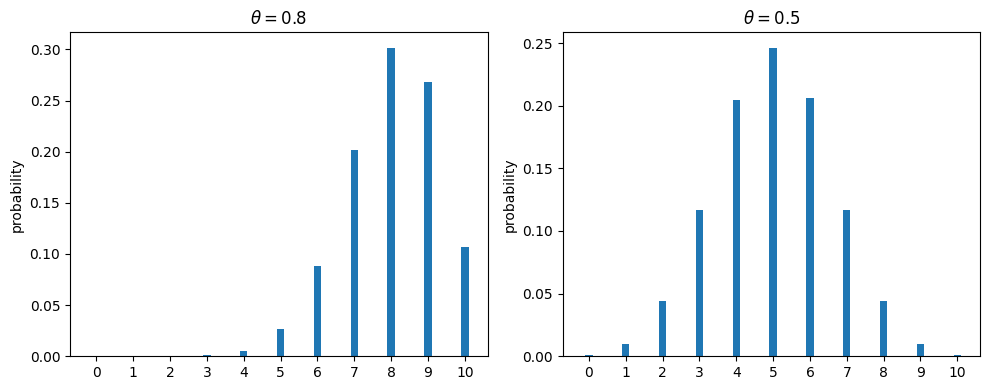

In [5]:
fig = plt.figure(figsize=(10, 4))

n = 10

ax = fig.add_subplot(121)
theta = 0.8
x = np.random.binomial(n, theta, N)
# グラフ全体を1で正規化
ax.hist(x, weights=np.ones(N)/N, align='left',
        bins=sorted([i for i in range(n+1)] + [i+0.2 for i in range(n+1)]))
ax.set_xticks([i for i in range(n+1)])
ax.set_ylabel('probability')
ax.set_title(r'$\theta=$'+str(theta))

ax = fig.add_subplot(122)
theta = 0.5
x = np.random.binomial(n, theta, N)
# グラフ全体を1で正規化
ax.hist(x, weights=np.ones(N)/N, align='left',
        bins=sorted([i for i in range(n+1)] + [i+0.2 for i in range(n+1)]))
ax.set_xticks([i for i in range(n+1)])
ax.set_ylabel('probability')
ax.set_title(r'$\theta=$'+str(theta))

plt.tight_layout()
plt.show()


2項分布の平均と分散は以下の通り。

\begin{aligned}
E[X] &= \sum_{x=0}^n x \cdot {}_nC_x \theta^{x} (1-\theta)^{n-x} \\
&= \sum_{x=1}^{n} x\cdot {}_nC_x \theta^{x} (1-\theta)^{n-x} \\
&= \sum_{x=0}^{n-1} (x+1)\cdot {}_nC_{x+1} \theta^{x+1} (1-\theta)^{n-x-1} \\
&= \sum_{x=0}^{n-1} n\theta \cdot {}_{n-1}C_{x} \theta^{x}(1-\theta)^{n-x-1}  (\because (x+1)\cdot {}_nC_{x+1}=n\cdot{}_{n-1}C_{x}) \\
&= n\theta (\because 2項定理) \\
\\
E[X^2] &= \sum_{x=0}^n x^2 \cdot {}_nC_x \theta^{x} (1-\theta)^{n-x} \\
&= \sum_{x=0}^{n-1} (x+1)^2 \cdot {}_nC_{x+1} \theta^{x+1} (1-\theta)^{n-x-1} \\
&= \sum_{x=0}^{n-1} n(x+1) \cdot {}_{n-1}C_{x} \theta^{x+1} (1-\theta)^{n-x-1} \\
&= \sum_{x=0}^{n-1} n\theta(x+1) \cdot {}_{n-1}C_{x} \theta^{x} (1-\theta)^{n-x-1} \\
&= n\theta + \sum_{x=0}^{n-1} nx\theta  \cdot {}_{n-1}C_{x} \theta^{x} (1-\theta)^{n-x-1} \\
&= n\theta + \sum_{x=0}^{n-2} n(x+1)\theta  \cdot {}_{n-1}C_{x+1} \theta^{x+1} (1-\theta)^{n-x-2} \\
&= n\theta + \sum_{x=0}^{n-2} n(n-1)\theta^2  \cdot {}_{n-2}C_{x} \theta^{x} (1-\theta)^{n-x-2} \\
&= n\theta + n(n-1)\theta^2 \\
\\
V[X] &= E[X^2] - E[X]^2 \\
&= n\theta(1-\theta)
\end{aligned}

結局、期待値も分散もベルヌイ分布のn倍になる。

### 2.2.3 分布関数

## 2.3 連続型確率密度関数

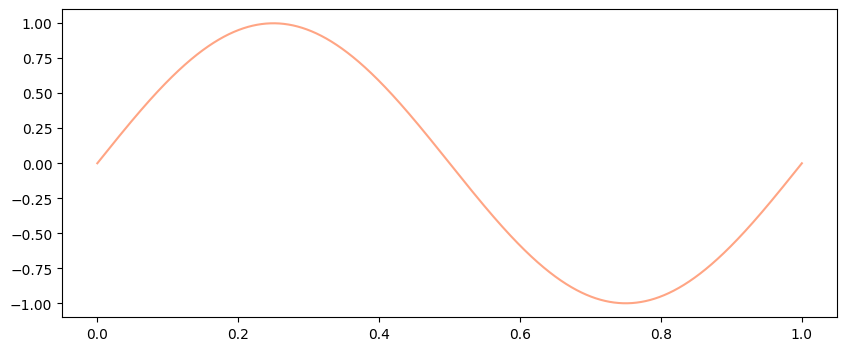

In [7]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()

x = np.linspace(0, 1, N)
y = np.sin(2*np.pi*x)

ax.plot(x, y, color="coral", alpha=0.7)

plt.show()

## 復習用まとめ

- 和の期待値
- 定数倍の期待値
- 積の期待値
- 1 次変換の分散
- ベルヌイ試行とは？
- PMF とは？
- 母数とは？
- ベルヌイ分布の期待値と分散
- 2項分布の期待値と分散
- 累積分布関数とは？
- 連続確率変数とは？
- 確率密度関数とは？
- 連続型確率変数の期待値と分散の求め方
- 正規分布の確率密度関数
- 標本分布とは？
- 最尤推定法とは？
- 尤度と確率の違い
- 推定値・推定量とは？
- 正規分布の最尤推定量